In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\datasets\\train.csv")[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


Looking for nan values

In [3]:
df.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

Text(0.5, 1.0, 'Before')

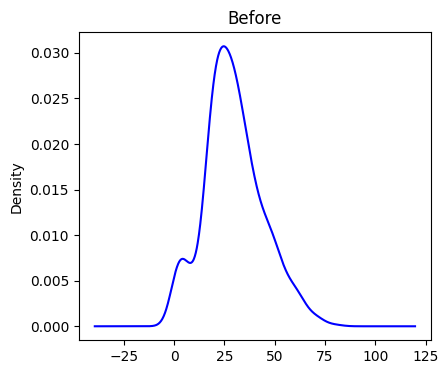

In [20]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Age'].plot.density(color='Blue') #before
ax1.set_title("Before")

Train test split

In [4]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Applying knn imputer

In [5]:
knn=KNNImputer()
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)
x_test_trf

array([[ 22.8   ,   3.    ,  15.2458],
       [ 31.    ,   2.    ,  10.5   ],
       [ 20.    ,   3.    ,   7.925 ],
       [  6.    ,   2.    ,  33.    ],
       [ 14.    ,   3.    ,  11.2417],
       [ 26.    ,   1.    ,  78.85  ],
       [ 37.3   ,   3.    ,   7.75  ],
       [ 16.    ,   3.    ,  18.    ],
       [ 16.    ,   3.    ,   7.75  ],
       [ 19.    ,   1.    ,  26.2833],
       [ 37.    ,   1.    ,  53.1   ],
       [ 44.    ,   3.    ,   8.05  ],
       [ 19.    ,   3.    ,  25.4667],
       [ 30.    ,   3.    ,   7.225 ],
       [ 36.    ,   2.    ,  13.    ],
       [ 16.    ,   1.    ,  39.4   ],
       [ 42.    ,   1.    ,  52.5542],
       [ 27.    ,   3.    ,   7.8292],
       [ 27.    ,   2.    ,  13.    ],
       [ 47.    ,   1.    ,  52.    ],
       [ 24.    ,   3.    ,   7.8958],
       [ 34.    ,   1.    ,  26.55  ],
       [ 19.    ,   3.    ,   7.8542],
       [ 20.    ,   3.    ,   9.225 ],
       [ 29.9   ,   3.    ,  14.5   ],
       [ 10.    ,   3.   

Converting imputed dataset columns to dataframes

In [6]:
pd.DataFrame(x_train_trf,columns=x_train.columns)

,Age,Pclass,Fare
0,45.5,1.0,28.5000
1,23.0,2.0,13.0000
2,32.0,3.0,7.9250
3,26.0,3.0,7.8542
4,6.0,3.0,31.2750
...,...,...,...
707,21.0,3.0,7.6500
708,39.0,1.0,31.0000
709,41.0,3.0,14.1083
710,14.0,1.0,120.0000


Text(0.5, 1.0, 'After')

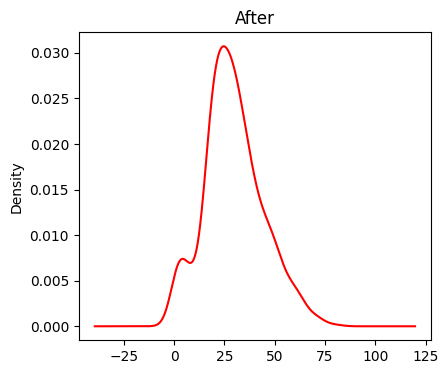

In [12]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
df['Age'].plot.density(color='red') #after
ax1.set_title("After")

Applying knn Logistic Regression to dataset 

In [8]:
lr=LogisticRegression()
lr.fit(x_train_trf,y_train)
y_pred=lr.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7430167597765364

Applying Simple imputer

In [9]:
si=SimpleImputer()
x_train_trf2=si.fit_transform(x_train)
x_test_trf2=si.transform(x_test)
x_train_trf2

array([[ 45.5   ,   1.    ,  28.5   ],
       [ 23.    ,   2.    ,  13.    ],
       [ 32.    ,   3.    ,   7.925 ],
       ...,
       [ 41.    ,   3.    ,  14.1083],
       [ 14.    ,   1.    , 120.    ],
       [ 21.    ,   1.    ,  77.2875]], shape=(712, 3))

Converting imputed dataset to dataframes

In [10]:
pd.DataFrame(x_train_trf2,columns=x_train.columns)

,Age,Pclass,Fare
0,45.500000,1.0,28.5000
1,23.000000,2.0,13.0000
2,32.000000,3.0,7.9250
3,26.000000,3.0,7.8542
4,6.000000,3.0,31.2750
...,...,...,...
707,21.000000,3.0,7.6500
708,29.498846,1.0,31.0000
709,41.000000,3.0,14.1083
710,14.000000,1.0,120.0000


Applying Logistic Regression to Simple Imputer to dataset

In [11]:
lr=LogisticRegression()
lr.fit(x_train_trf2,y_train)
y_pred2=lr.predict(x_test_trf2)
accuracy_score(y_test,y_pred2)

0.7374301675977654